In [153]:
import numpy as np
import pandas as pd

In [154]:
data = pd.read_csv("train_data.csv")

In [155]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [157]:
columns_to_drop = ["case_id","patientid"]

In [158]:
data_clean = data.drop(columns_to_drop,axis=1)

In [159]:
data_clean.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [160]:
print(type(data_clean['Stay'][0]))

<class 'str'>


In [161]:
labels_to_int = {}
rev_dict = {}

cnt = 0
for s in data_clean['Stay']:
    if s not in labels_to_int:
        labels_to_int[s] = cnt
        rev_dict[cnt] = s
        cnt += 1

In [162]:
labels_to_int

{'0-10': 0,
 '41-50': 1,
 '31-40': 2,
 '11-20': 3,
 '51-60': 4,
 '21-30': 5,
 '71-80': 6,
 'More than 100 Days': 7,
 '81-90': 8,
 '61-70': 9,
 '91-100': 10}

In [163]:
rev_dict

{0: '0-10',
 1: '41-50',
 2: '31-40',
 3: '11-20',
 4: '51-60',
 5: '21-30',
 6: '71-80',
 7: 'More than 100 Days',
 8: '81-90',
 9: '61-70',
 10: '91-100'}

In [164]:
for i in range(len(data_clean['Stay'])):
    data_clean['Stay'][i] = labels_to_int[data_clean['Stay'][i]]

C:\Users\Hemant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [165]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_clean["Hospital_type_code"] = le.fit_transform(data_clean["Hospital_type_code"])
data_clean["Department"] = le.fit_transform(data_clean["Department"])
data_clean["Hospital_region_code"] = le.fit_transform(data_clean["Hospital_region_code"])
data_clean["Ward_Type"] = le.fit_transform(data_clean["Ward_Type"])
data_clean["Ward_Facility_Code"] = le.fit_transform(data_clean["Ward_Facility_Code"])
data_clean["Severity of Illness"] = le.fit_transform(data_clean["Severity of Illness"])
data_clean["Type of Admission"] = le.fit_transform(data_clean["Type of Admission"])
data_clean["Age"] = le.fit_transform(data_clean["Age"])

In [166]:
data_clean.describe()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,313906.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,18.318841,1.256841,4.771717,0.778098,3.197627,1.943779,1.888575,3.286913,2.625807,7.251859,0.782768,1.374076,3.284099,4.127777,4880.749392
std,8.633755,1.535712,3.102535,0.752527,1.168171,0.561245,0.804655,1.688050,0.873146,4.745266,0.688957,0.768377,1.764061,1.889567,1086.776254
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,4.000000,0.000000,1.000000,2.000000,3.000000,4186.000000
50%,19.000000,1.000000,5.000000,1.000000,3.000000,2.000000,2.000000,4.000000,3.000000,8.000000,1.000000,2.000000,3.000000,4.000000,4741.000000
75%,26.000000,2.000000,7.000000,1.000000,4.000000,2.000000,2.000000,5.000000,3.000000,8.000000,1.000000,2.000000,4.000000,5.000000,5409.000000
max,32.000000,6.000000,13.000000,2.000000,24.000000,4.000000,5.000000,5.000000,4.000000,38.000000,2.000000,2.000000,32.000000,9.000000,11008.000000


In [167]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [168]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null int32
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null int32
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null int32
Ward_Type                            318438 non-null int32
Ward_Facility_Code                   318438 non-null int32
Bed Grade                            318325 non-null float64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null int32
Severity of Illness                  318438 non-null int32
Visitors with Patient                318438 non-null int64
Age                                  318438 non-null int32
Admission_Deposit                    318438 non-null float6

In [169]:
data_clean.head(20)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.0,7.0,0,0,2,5,4911.0,0
1,2,2,5,2,2,3,3,5,2.0,7.0,1,0,2,5,5954.0,1
2,10,4,1,0,2,1,3,4,2.0,7.0,1,0,2,5,4745.0,2
3,26,1,2,1,2,3,2,3,2.0,7.0,1,0,2,5,7272.0,1
4,26,1,2,1,2,3,3,3,2.0,7.0,1,0,2,5,5558.0,1
5,23,0,6,0,2,1,3,5,2.0,7.0,1,0,2,5,4449.0,3
6,32,5,9,1,1,3,3,1,3.0,7.0,0,0,2,5,6167.0,0
7,23,0,6,0,4,3,1,5,3.0,7.0,1,0,2,5,5571.0,1
8,1,3,10,1,2,2,2,1,4.0,7.0,1,0,2,5,7223.0,4
9,10,4,1,0,2,2,3,4,3.0,7.0,1,0,2,5,6056.0,2


In [170]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null int32
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null int32
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null int32
Ward_Type                            318438 non-null int32
Ward_Facility_Code                   318438 non-null int32
Bed Grade                            318325 non-null float64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null int32
Severity of Illness                  318438 non-null int32
Visitors with Patient                318438 non-null int64
Age                                  318438 non-null int32
Admission_Deposit                    318438 non-null float6

In [172]:
data_clean = data_clean.fillna(data_clean["City_Code_Patient"].argmax())

C:\Users\Hemant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [173]:
data_clean = data_clean.fillna(data_clean["Bed Grade"].argmax())

C:\Users\Hemant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [174]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null int32
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null int32
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null int32
Ward_Type                            318438 non-null int32
Ward_Facility_Code                   318438 non-null int32
Bed Grade                            318438 non-null float64
City_Code_Patient                    318438 non-null float64
Type of Admission                    318438 non-null int32
Severity of Illness                  318438 non-null int32
Visitors with Patient                318438 non-null int64
Age                                  318438 non-null int32
Admission_Deposit                    318438 non-null float6

In [175]:
from sklearn.tree import DecisionTreeClassifier
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [176]:
input_cols = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit']

In [177]:
output_cols = ['Stay']

In [178]:
x = data_clean[input_cols]
y = data_clean[output_cols]

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [180]:
print(x_train.shape,y_train.shape)
print(y_test.shape,y_test.shape)

(254750, 15) (254750, 1)
(63688, 1) (63688, 1)


In [181]:
sk_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [182]:
sk_tree.predict(x_test)

array([5, 3, 3, ..., 4, 3, 3], dtype=int64)

In [183]:
sk_tree.score(x_test,y_test)

0.36372629066700163

In [184]:
accuracy = []
for h in range(3,30):
    sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=h)
    sk_tree.fit(x_train,y_train)
    accuracy.append(sk_tree.score(x_test,y_test))

In [185]:
import matplotlib.pyplot as plt

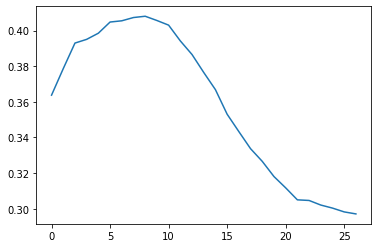

In [186]:
plt.plot(accuracy)
plt.show()

In [187]:
np.argmax(accuracy)

8

In [188]:
depth = 3 + np.argmax(accuracy)

In [189]:
print(accuracy[8])

0.4080203492023615


In [190]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
sk_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [191]:
y_pred = sk_tree.predict(x_test)

In [194]:
y_pred = list(y_pred)

In [195]:
for i in range(len(y_pred)):
    y_pred[i] = rev_dict[y_pred[i]]

In [196]:
y_pred

['21-30',
 '0-10',
 '11-20',
 '0-10',
 '21-30',
 '31-40',
 '21-30',
 '21-30',
 '11-20',
 '21-30',
 '21-30',
 '11-20',
 '51-60',
 '51-60',
 '11-20',
 '11-20',
 '31-40',
 '11-20',
 '21-30',
 '21-30',
 '21-30',
 '11-20',
 '11-20',
 '11-20',
 '21-30',
 '21-30',
 '21-30',
 '11-20',
 '21-30',
 '21-30',
 '11-20',
 '21-30',
 '21-30',
 '51-60',
 '21-30',
 '21-30',
 '11-20',
 '21-30',
 '51-60',
 '21-30',
 '51-60',
 '21-30',
 '11-20',
 '21-30',
 '11-20',
 '21-30',
 '11-20',
 '21-30',
 '11-20',
 '21-30',
 '21-30',
 '21-30',
 '11-20',
 '21-30',
 '11-20',
 '31-40',
 '21-30',
 '21-30',
 '51-60',
 '11-20',
 '11-20',
 '21-30',
 '31-40',
 '21-30',
 '11-20',
 '21-30',
 '11-20',
 '21-30',
 '51-60',
 '51-60',
 '11-20',
 '21-30',
 '21-30',
 '11-20',
 '21-30',
 '51-60',
 '11-20',
 '21-30',
 '51-60',
 '51-60',
 '11-20',
 '21-30',
 '11-20',
 '21-30',
 '11-20',
 '11-20',
 '51-60',
 '21-30',
 '21-30',
 '21-30',
 '11-20',
 '31-40',
 '11-20',
 '21-30',
 '11-20',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [213]:
ytmp = np.array(y_train)

In [214]:
ytmp = np.reshape(ytmp,(-1,))

In [215]:
ytmp.shape

(254750,)

In [216]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=depth),x_train,ytmp,cv=5).mean()
    acc_list.append(acc)

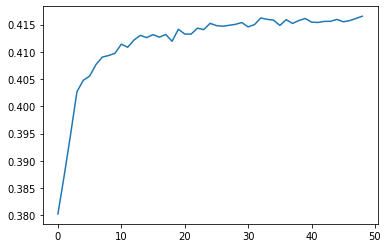

In [217]:
plt.plot(acc_list)
plt.show()

In [218]:
trees = np.argmax(acc_list) + 1

In [219]:
trees

49

In [221]:
rf = RandomForestClassifier(n_estimators=49,criterion='entropy',max_depth=11)

In [222]:
rf.fit(x_train,y_train)

C:\Users\Hemant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=49,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [224]:
print(rf.score(x_test,y_test))

0.4166247958799146


In [225]:
print(rf.score(x_train,y_train))

0.4409774288518155


In [226]:
y = pd.read_csv('test_data.csv')

In [227]:
y.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [228]:
y = y.drop(columns_to_drop,axis=1)

In [229]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 15 columns):
Hospital_code                        137057 non-null int64
Hospital_type_code                   137057 non-null object
City_Code_Hospital                   137057 non-null int64
Hospital_region_code                 137057 non-null object
Available Extra Rooms in Hospital    137057 non-null int64
Department                           137057 non-null object
Ward_Type                            137057 non-null object
Ward_Facility_Code                   137057 non-null object
Bed Grade                            137022 non-null float64
City_Code_Patient                    134900 non-null float64
Type of Admission                    137057 non-null object
Severity of Illness                  137057 non-null object
Visitors with Patient                137057 non-null int64
Age                                  137057 non-null object
Admission_Deposit                    137057 non-nul

In [230]:
y["Hospital_type_code"] = le.fit_transform(y["Hospital_type_code"])
y["Department"] = le.fit_transform(y["Department"])
y["Hospital_region_code"] = le.fit_transform(y["Hospital_region_code"])
y["Ward_Type"] = le.fit_transform(y["Ward_Type"])
y["Ward_Facility_Code"] = le.fit_transform(y["Ward_Facility_Code"])
y["Severity of Illness"] = le.fit_transform(y["Severity of Illness"])
y["Type of Admission"] = le.fit_transform(y["Type of Admission"])
y["Age"] = le.fit_transform(y["Age"])

In [231]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 15 columns):
Hospital_code                        137057 non-null int64
Hospital_type_code                   137057 non-null int32
City_Code_Hospital                   137057 non-null int64
Hospital_region_code                 137057 non-null int32
Available Extra Rooms in Hospital    137057 non-null int64
Department                           137057 non-null int32
Ward_Type                            137057 non-null int32
Ward_Facility_Code                   137057 non-null int32
Bed Grade                            137022 non-null float64
City_Code_Patient                    134900 non-null float64
Type of Admission                    137057 non-null int32
Severity of Illness                  137057 non-null int32
Visitors with Patient                137057 non-null int64
Age                                  137057 non-null int32
Admission_Deposit                    137057 non-null float6

In [232]:
y = y.fillna(y["City_Code_Patient"].argmax())
y = y.fillna(y["Bed Grade"].argmax())

C:\Users\Hemant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.
C:\Users\Hemant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


In [233]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 15 columns):
Hospital_code                        137057 non-null int64
Hospital_type_code                   137057 non-null int32
City_Code_Hospital                   137057 non-null int64
Hospital_region_code                 137057 non-null int32
Available Extra Rooms in Hospital    137057 non-null int64
Department                           137057 non-null int32
Ward_Type                            137057 non-null int32
Ward_Facility_Code                   137057 non-null int32
Bed Grade                            137057 non-null float64
City_Code_Patient                    137057 non-null float64
Type of Admission                    137057 non-null int32
Severity of Illness                  137057 non-null int32
Visitors with Patient                137057 non-null int64
Age                                  137057 non-null int32
Admission_Deposit                    137057 non-null float6

In [234]:
y_pred = rf.predict(y)

In [236]:
y_pred = list(y_pred)

In [237]:
for i in range(len(y_pred)):
    y_pred[i] = rev_dict[y_pred[i]]

In [238]:
y_pred

['0-10',
 '51-60',
 '21-30',
 '21-30',
 '51-60',
 '21-30',
 '21-30',
 '11-20',
 '11-20',
 '11-20',
 '21-30',
 '31-40',
 '11-20',
 '11-20',
 '31-40',
 '31-40',
 '11-20',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '51-60',
 '11-20',
 '31-40',
 '51-60',
 '11-20',
 '11-20',
 '21-30',
 '21-30',
 '31-40',
 '11-20',
 '21-30',
 '51-60',
 '11-20',
 '21-30',
 '21-30',
 '0-10',
 '21-30',
 '21-30',
 '51-60',
 '11-20',
 '11-20',
 '21-30',
 '11-20',
 '11-20',
 '21-30',
 '11-20',
 '21-30',
 '0-10',
 '21-30',
 'More than 100 Days',
 'More than 100 Days',
 '51-60',
 '51-60',
 '31-40',
 '51-60',
 '11-20',
 '21-30',
 '21-30',
 '11-20',
 '21-30',
 '21-30',
 '21-30',
 '11-20',
 '11-20',
 '11-20',
 '11-20',
 '11-20',
 '11-20',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '11-20',
 '11-20',
 '21-30',
 '21-30',
 '11-20',
 '11-20',
 '21-30',
 '21-30',
 '21-30',
 '51-60',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '21-30',
 '51-60',
 '21-30',
 '21-30',
 '21-30',
 '11-20

In [239]:
y = pd.read_csv('test_data.csv')

In [240]:
my_df = pd.DataFrame({'case_id':y['case_id'],'Stay':y_pred})

In [241]:
my_df.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [243]:
my_df.to_csv("my_predictions.csv", index=False)